In [ ]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # "0,1,2,3" # "0"

In [ ]:
import numpy as np
import h5py
import cv2
import os, sys
import argparse
from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img_no_crop
from core.utils import TedataLoader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from core.watershed import watershed,watershed_per_img,watershed_original,watershed_test
from core.median_filter import apply_median_filter_cpu, apply_median_filter_gpu, apply_median_filter_gpu_simple
%load_ext autoreload
%autoreload 2

In [ ]:
img_dict = {}
segmentation_dict = {}
debug = False
print_img=False
# target_y = 'F08'
# dataset_version = 'v2'
# target = f"{target_y}_{dataset_version}"

target_list = [f"median_filter"]
for target in [['F02','v2'],['F04','v2'],['F08','v2'],['F16','v2'],['F16','v1']]:
    target = f"{target[0]}_{target[1]}"
    target_list.append(target)
for target in target_list:
    # print(target)
    data_path = f"./intermediate_result/denoised_img_{target}_img_dict.npy"
    print(data_path.split("/")[2:])
    img_dict = np.load(data_path,allow_pickle=True).item()

    for set_num in img_dict.keys():
        # print(img_dict[set_num].keys())
        segmentation_dict[set_num] = {}
        folder_name = f"./segmentation_img/{target}"
        os.makedirs(f"{folder_name}/{set_num}", exist_ok=True)
        for f_num in img_dict[set_num].keys():
            # print(denoised_img_dict[set_num][f_num].shape)
            segmentation_dict[set_num][f_num] = None
            f_num = f_num[:3]
            for idx,img in enumerate(img_dict[set_num][f_num]):
                # print(img.shape,img.min(),img.max())
                img_uint8 = (img[0]*255).astype('uint8')[:-20]

                # img_uint8 = apply_median_filter_gpu_simple(img_uint8,repeat=3)[0][0].astype('uint8')
                # print(img_uint8.shape,img_uint8.min(),img_uint8.max())
                r = watershed_original(img_uint8)
                # r = watershed_test(img_uint8)
                if print_img is True:
                    plt.title(f"denoiser : {target}\n{set_num}_{f_num}_{idx}")
                    # r[r>-1] = 1
                    plt.imshow(r)
                    plt.pause(0.01)
                    break
                break
            break
        break

# Test divide section

In [81]:
# r_val = 870
range_list = range(900,1200,10)
possible_section = []
for r_val in range_list :
    x_val, y_val = [], []
    cnt = 0
    x_val, y_val = [], []
    for idx,val in enumerate(r[r_val]):
        if val == -1:
            # print(idx,end=",")
            x_val.append(idx)
            y_val.append(r_val)
            cnt+=1
    # print("")
    print(f"{r_val} : edge cnt: {cnt}")
    if cnt > 70 :
        possible_section.append(r_val)

900 : edge cnt: 35
910 : edge cnt: 36
920 : edge cnt: 37
930 : edge cnt: 36
940 : edge cnt: 60
950 : edge cnt: 118
960 : edge cnt: 57
970 : edge cnt: 61
980 : edge cnt: 37
990 : edge cnt: 36
1000 : edge cnt: 36
1010 : edge cnt: 37
1020 : edge cnt: 36
1030 : edge cnt: 37
1040 : edge cnt: 35
1050 : edge cnt: 36
1060 : edge cnt: 37
1070 : edge cnt: 37
1080 : edge cnt: 37
1090 : edge cnt: 49
1100 : edge cnt: 90
1110 : edge cnt: 32
1120 : edge cnt: 133
1130 : edge cnt: 54
1140 : edge cnt: 37
1150 : edge cnt: 36
1160 : edge cnt: 38
1170 : edge cnt: 35
1180 : edge cnt: 36
1190 : edge cnt: 35


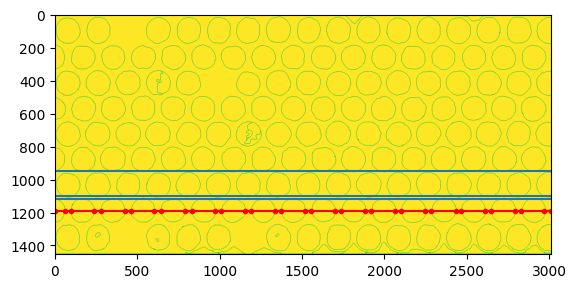

In [82]:

plt.plot(x_val,y_val,marker='o',color='r',markersize=3)
plt.imshow(r)
# plt.axhline(r_val)
for i in possible_section:
    plt.axhline(i)

In [111]:
# 16 * 2 + 1 + 2(좌우 끝) = 35
# plt.plot(r[r_val])

print(np.unique(r[r_val], return_counts=True))

(array([-1,  1], dtype=int32), array([  38, 2972]))


In [112]:
f"{set_num}_{f_num}_{idx}"

'SET01_F08_15'

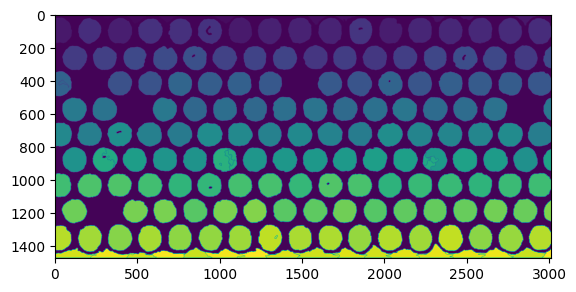

In [134]:

r = watershed_original(img_uint8)
plt.imshow(r)

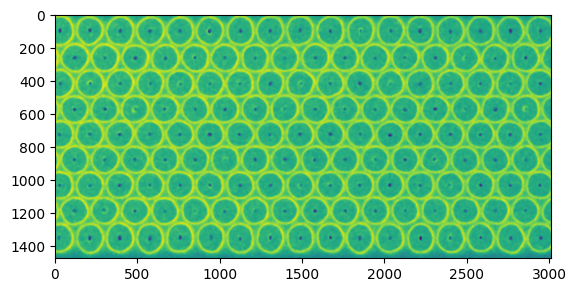

torch.Size([1, 1, 1474, 3010])


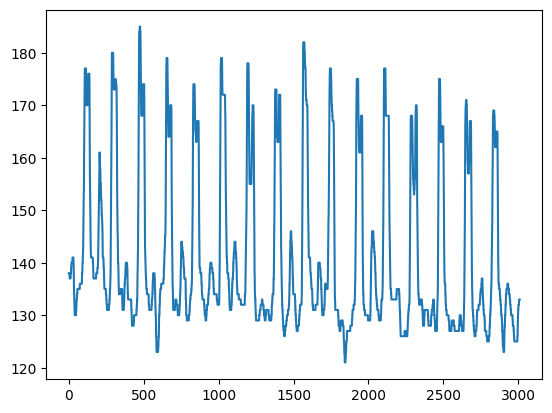

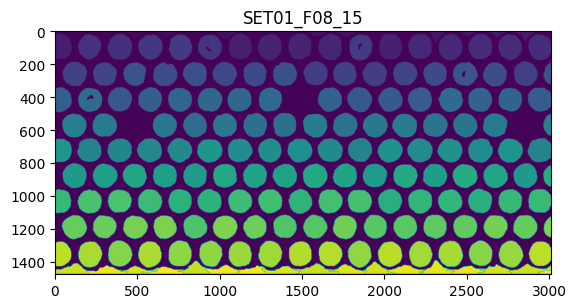

In [143]:

from scipy.ndimage import median_filter

img_uint8 = (img[0]*255).astype('uint8')
plt.imshow(img_uint8)
plt.pause(0.01)
new_img = apply_median_filter_gpu_simple(img_uint8)
# plt.imshow(new_img)
new_img = new_img[0][0].astype('uint8')
plt.plot(new_img[400])
plt.pause(0.01)
r = watershed_original(new_img)
plt.title(f"{set_num}_{f_num}_{idx}")
plt.imshow(r)
plt.pause(0.01)

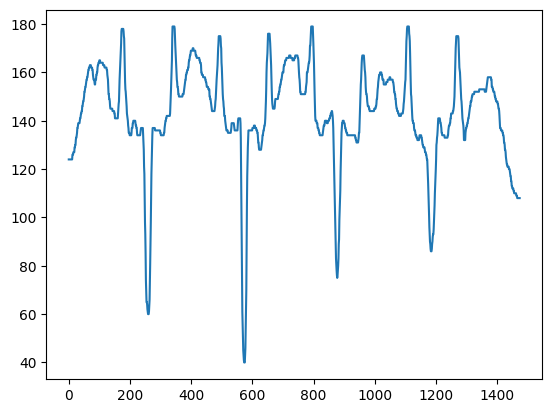

In [89]:
plt.plot(img_uint8[:,120])

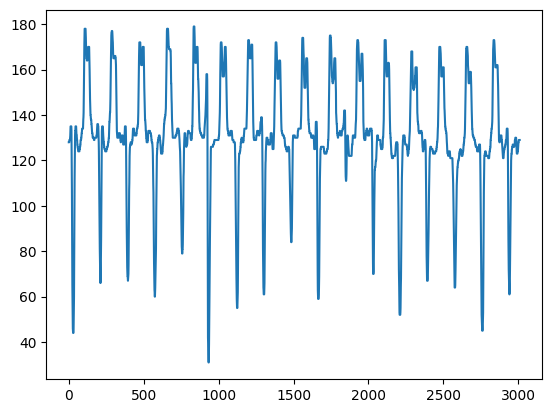

In [63]:
plt.plot(img_uint8[100])

(1474, 3010)


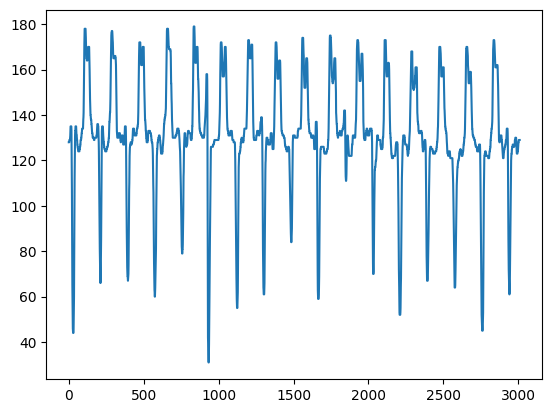

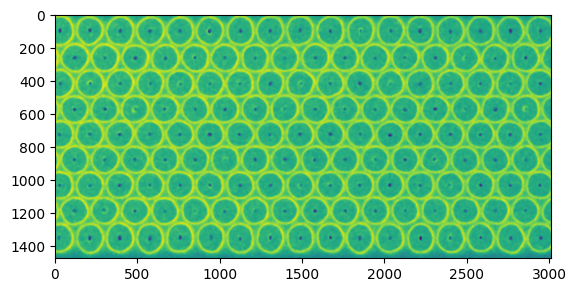

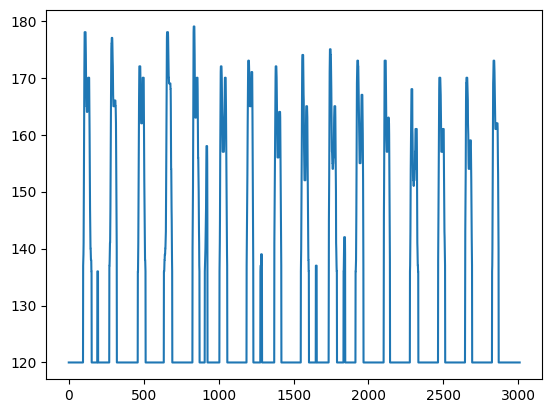

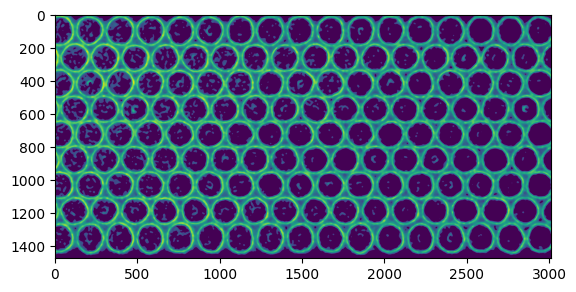

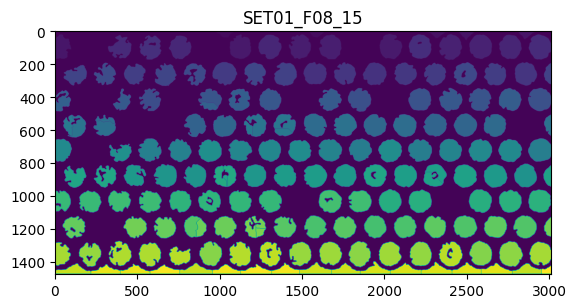

In [91]:
print(img_uint8.shape)
from copy import deepcopy
new_img = deepcopy(img_uint8)
plt.plot(img_uint8[100])
plt.pause(0.01)
plt.imshow(img_uint8)
plt.pause(0.01)
new_img[new_img<136] = 120
# new_img[new_img>185] = 0
plt.plot(new_img[100])
plt.pause(0.01)
plt.imshow(new_img)
plt.pause(0.01)
r = watershed_original(new_img)
plt.title(f"{set_num}_{f_num}_{idx}")
plt.imshow(r)
plt.pause(0.01)

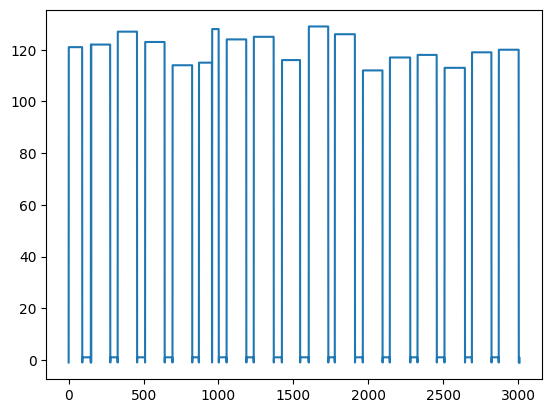

In [73]:
plt.plot(r[1000])

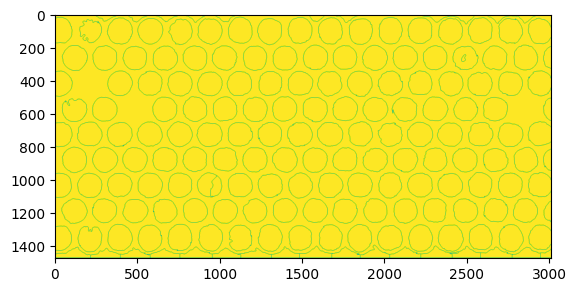

In [84]:
r[r!=-1] = 0
plt.imshow(r)